#### 1D conv model
For devel on BLCA and BRCA gexp data files
OneDrive:

kernel setup:
    local:
        hold
    Exacloud:
        hold

In [ ]:
%whos

In [34]:
ls ../a_data_structure/normed_data/ # BLCA data

raw/            test_norm.tsv   train_norm.tsv


In [4]:
# import glob
# import tensorflow as tf
import numpy as np
import pandas as pd

In [ ]:
# go back for labels, to UMAP

In [5]:
train_norm = pd.read_csv('../a_data_structure/normed_data/train_norm.tsv',
                  sep = '\t',
                   index_col = 0)

In [6]:
test_norm = pd.read_csv('../a_data_structure/normed_data/test_norm.tsv',
                  sep = '\t',
                   index_col = 0)

In [7]:
train_norm.head(1)

,N:GEXP::?:100130426:,N:GEXP::?:100133144:,N:GEXP::?:100134869:,N:GEXP::?:10357:,N:GEXP::?:10431:,N:GEXP::?:136542:,N:GEXP::?:155060:,N:GEXP::?:26823:,N:GEXP::?:280660:,N:GEXP::?:317712:,...,N:GEXP::ZXDA:7789:,N:GEXP::ZXDB:158586:,N:GEXP::ZXDC:79364:,N:GEXP::ZYG11A:440590:,N:GEXP::ZYG11B:79699:,N:GEXP::ZYX:7791:,N:GEXP::ZZEF1:23140:,N:GEXP::ZZZ3:26009:,N:GEXP::psiTPTE22:387590:,N:GEXP::tAKR:389932:
0,0.0,0.0,0.060688,0.190093,0.120877,0.0,0.064528,0.0,0.0,0.0,...,0.167245,0.226274,0.219092,0.014614,0.376986,0.140468,0.135513,0.186737,0.009614,0.040715


In [8]:
train_norm.shape

(299, 20531)

In [9]:
type(train_norm.iloc[0,0])

numpy.float64

In [11]:
from keras.layers import Input # compiling model does not ensure fitting

2022-10-10 15:48:21.622646: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [12]:
Input.__doc__

"`Input()` is used to instantiate a Keras tensor.\n\n    A Keras tensor is a symbolic tensor-like object, which we augment with\n    certain attributes that allow us to build a Keras model just by knowing the\n    inputs and outputs of the model.\n\n    For instance, if `a`, `b` and `c` are Keras tensors,\n    it becomes possible to do:\n    `model = Model(input=[a, b], output=c)`\n\n    Args:\n        shape: A shape tuple (integers), not including the batch size.\n            For instance, `shape=(32,)` indicates that the expected input\n            will be batches of 32-dimensional vectors. Elements of this tuple\n            can be None; 'None' elements represent dimensions where the shape is\n            not known.\n        batch_size: optional static batch size (integer).\n        name: An optional name string for the layer.\n            Should be unique in a model (do not reuse the same name twice).\n            It will be autogenerated if it isn't provided.\n        dtype: The d

In [24]:
Conv1D.__doc__

'1D convolution layer (e.g. temporal convolution).\n\n    This layer creates a convolution kernel that is convolved\n    with the layer input over a single spatial (or temporal) dimension\n    to produce a tensor of outputs.\n    If `use_bias` is True, a bias vector is created and added to the outputs.\n    Finally, if `activation` is not `None`,\n    it is applied to the outputs as well.\n\n    When using this layer as the first layer in a model,\n    provide an `input_shape` argument\n    (tuple of integers or `None`, e.g.\n    `(10, 128)` for sequences of 10 vectors of 128-dimensional vectors,\n    or `(None, 128)` for variable-length sequences of 128-dimensional vectors.\n\n    Examples:\n\n    >>> # The inputs are 128-length vectors with 10 timesteps, and the\n    >>> # batch size is 4.\n    >>> input_shape = (4, 10, 128)\n    >>> x = tf.random.normal(input_shape)\n    >>> y = tf.keras.layers.Conv1D(\n    ... 32, 3, activation=\'relu\',input_shape=input_shape[1:])(x)\n    >>> prin

In [13]:
encoder_input = Input(shape=train_norm.shape)

In [19]:
encoder_input # inferred and inserted batch size

<KerasTensor: shape=(None, 299, 20531) dtype=float32 (created by layer 'input_1')>

In [16]:
import tensorflow as tf

In [17]:
multiplier = tf.placeholder(shape=(1,), dtype=tf.float32)

AttributeError: module 'tensorflow' has no attribute 'placeholder'

In [ ]:
# filters go up through encoder layers, outward in detail
# e.g. 8 first, then 16 on next layer

# 

In [31]:
encoder_conv = Conv1D(filters=8, kernel_size=3)

In [32]:
encoder_conv = Conv1D(filters=8, kernel_size=3)(encoder_input)

2022-10-10 13:12:51.060712: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [33]:
encoder_conv = Conv1D(filters=8,
                      kernel_size=3,
                      activation='relu',
                      padding='same')(encoder_input) # done

In [60]:
train_norm.shape

(299, 20531)

In [61]:
encoder_input

<tf.Tensor 'input_11:0' shape=(None, 299, 20531) dtype=float32>

In [62]:
train_norm.reshape('None', 299, 29531)

AttributeError: 'DataFrame' object has no attribute 'reshape'

In [64]:
np.array(train_norm)

array([[0.        , 0.        , 0.06068844, ..., 0.18673746, 0.0096144 ,
        0.04071533],
       [0.        , 0.2001788 , 0.10994696, ..., 0.17413426, 0.00171236,
        0.        ],
       [0.        , 0.17052312, 0.15240276, ..., 0.12215772, 0.00491615,
        0.        ],
       ...,
       [0.        , 0.02402216, 0.05041014, ..., 0.1319427 , 0.00383435,
        0.        ],
       [0.        , 0.02883224, 0.04229703, ..., 0.15928173, 0.04647292,
        0.        ],
       [0.        , 0.06031008, 0.09414756, ..., 0.12103451, 0.00174716,
        0.        ]])

In [69]:
np.array(train_norm).shape

(299, 20531)

In [68]:
np.array(train_norm).reshape(299, 29531,)

ValueError: cannot reshape array of size 6138769 into shape (299,29531)

In [6]:
train_norm

,N:GEXP::?:100130426:,N:GEXP::?:100133144:,N:GEXP::?:100134869:,N:GEXP::?:10357:,N:GEXP::?:10431:,N:GEXP::?:136542:,N:GEXP::?:155060:,N:GEXP::?:26823:,N:GEXP::?:280660:,N:GEXP::?:317712:,...,N:GEXP::ZXDA:7789:,N:GEXP::ZXDB:158586:,N:GEXP::ZXDC:79364:,N:GEXP::ZYG11A:440590:,N:GEXP::ZYG11B:79699:,N:GEXP::ZYX:7791:,N:GEXP::ZZEF1:23140:,N:GEXP::ZZZ3:26009:,N:GEXP::psiTPTE22:387590:,N:GEXP::tAKR:389932:
0,0.0,0.000000,0.060688,0.190093,0.120877,0.0,0.064528,0.000000,0.0,0.0,...,0.167245,0.226274,0.219092,0.014614,0.376986,0.140468,0.135513,0.186737,0.009614,0.040715
1,0.0,0.200179,0.109947,0.196140,0.138782,0.0,0.195341,0.000000,0.0,0.0,...,0.175930,0.195435,0.267575,0.001874,0.328280,0.370744,0.176791,0.174134,0.001712,0.000000
2,0.0,0.170523,0.152403,0.352650,0.102211,0.0,0.181813,0.071964,0.0,0.0,...,0.233610,0.233699,0.206320,0.002135,0.454074,0.167169,0.134349,0.122158,0.004916,0.000000
3,0.0,0.282052,0.239413,0.130320,0.210394,0.0,0.080955,0.000000,0.0,0.0,...,0.233219,0.405223,0.201969,0.061001,0.204115,0.120439,0.281065,0.137322,0.010770,0.000000
4,0.0,0.121046,0.031218,0.109394,0.121211,0.0,0.075722,0.094449,0.0,0.0,...,0.288672,0.286166,0.119374,0.001681,0.282114,0.256319,0.261425,0.255244,0.001536,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,0.0,0.109671,0.115990,0.232968,0.086312,0.0,0.056862,0.096083,1.0,0.0,...,0.274292,0.294382,0.528842,0.009122,0.159579,0.220478,0.193469,0.152499,0.006877,0.000000
295,0.0,0.033081,0.153703,0.533536,0.280695,0.0,0.071780,0.000000,0.0,0.0,...,0.188809,0.216848,0.350675,0.005808,0.067289,0.214540,0.274936,0.169784,0.003184,0.000000
296,0.0,0.024022,0.050410,0.422522,0.290997,0.0,0.144224,0.073663,0.0,0.0,...,0.092094,0.174669,0.367699,0.065125,0.492677,0.183901,0.092295,0.131943,0.003834,0.000000
297,0.0,0.028832,0.042297,0.120612,0.129261,0.0,0.778666,0.000000,0.0,0.0,...,0.092756,0.194098,0.268463,0.030101,0.552245,0.150499,0.234981,0.159282,0.046473,0.000000


In [25]:
train_norm_arr = train_norm.to_numpy()
train_norm_arr_exp = np.expand_dims(train_norm_arr, axis=-1)

In [8]:
train_norm_arr_exp.shape

(299, 20531, 1)

In [17]:
encoder_input

<tf.Tensor 'input_1:0' shape=(None, 299, 20531, 1) dtype=float32>

In [ ]:
shape

In [10]:
train_norm

,N:GEXP::?:100130426:,N:GEXP::?:100133144:,N:GEXP::?:100134869:,N:GEXP::?:10357:,N:GEXP::?:10431:,N:GEXP::?:136542:,N:GEXP::?:155060:,N:GEXP::?:26823:,N:GEXP::?:280660:,N:GEXP::?:317712:,...,N:GEXP::ZXDA:7789:,N:GEXP::ZXDB:158586:,N:GEXP::ZXDC:79364:,N:GEXP::ZYG11A:440590:,N:GEXP::ZYG11B:79699:,N:GEXP::ZYX:7791:,N:GEXP::ZZEF1:23140:,N:GEXP::ZZZ3:26009:,N:GEXP::psiTPTE22:387590:,N:GEXP::tAKR:389932:
0,0.0,0.000000,0.060688,0.190093,0.120877,0.0,0.064528,0.000000,0.0,0.0,...,0.167245,0.226274,0.219092,0.014614,0.376986,0.140468,0.135513,0.186737,0.009614,0.040715
1,0.0,0.200179,0.109947,0.196140,0.138782,0.0,0.195341,0.000000,0.0,0.0,...,0.175930,0.195435,0.267575,0.001874,0.328280,0.370744,0.176791,0.174134,0.001712,0.000000
2,0.0,0.170523,0.152403,0.352650,0.102211,0.0,0.181813,0.071964,0.0,0.0,...,0.233610,0.233699,0.206320,0.002135,0.454074,0.167169,0.134349,0.122158,0.004916,0.000000
3,0.0,0.282052,0.239413,0.130320,0.210394,0.0,0.080955,0.000000,0.0,0.0,...,0.233219,0.405223,0.201969,0.061001,0.204115,0.120439,0.281065,0.137322,0.010770,0.000000
4,0.0,0.121046,0.031218,0.109394,0.121211,0.0,0.075722,0.094449,0.0,0.0,...,0.288672,0.286166,0.119374,0.001681,0.282114,0.256319,0.261425,0.255244,0.001536,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,0.0,0.109671,0.115990,0.232968,0.086312,0.0,0.056862,0.096083,1.0,0.0,...,0.274292,0.294382,0.528842,0.009122,0.159579,0.220478,0.193469,0.152499,0.006877,0.000000
295,0.0,0.033081,0.153703,0.533536,0.280695,0.0,0.071780,0.000000,0.0,0.0,...,0.188809,0.216848,0.350675,0.005808,0.067289,0.214540,0.274936,0.169784,0.003184,0.000000
296,0.0,0.024022,0.050410,0.422522,0.290997,0.0,0.144224,0.073663,0.0,0.0,...,0.092094,0.174669,0.367699,0.065125,0.492677,0.183901,0.092295,0.131943,0.003834,0.000000
297,0.0,0.028832,0.042297,0.120612,0.129261,0.0,0.778666,0.000000,0.0,0.0,...,0.092756,0.194098,0.268463,0.030101,0.552245,0.150499,0.234981,0.159282,0.046473,0.000000


In [26]:
test_norm_arr = test_norm.to_numpy()
test_norm_arr_exp = np.expand_dims(test_norm_arr, axis=-1)

In [16]:
# Float.64 on 1Dconv run
# from https://becominghuman.ai/using-variational-autoencoder-vae-to-generate-new-images-14328877e88d

# train_norm_arr = train_norm.to_numpy()
# train_norm_arr_exp = np.expand_dims(train_norm_arr, axis=-1)

# test_norm_arr = test_norm.to_numpy()
# test_norm_arr_exp = np.expand_dims(test_norm_arr, axis=-1)

latent_dim = 100

# import numpy as np # clean up imports
# import matplotlib.pyplot as plt

import tensorflow as tf; tf.compat.v1.disable_eager_execution()

from keras import backend as K
from keras.layers import (Input, # want float.64 to go into this layer, two input layers (enc and dec)
                          Conv1D,
                          
                          Dense,
                          # Conv2D,

                          # Conv2DTranspose,
                          Conv1DTranspose,
                          Flatten, # might not need to go back to Dense
                          
                          Lambda,
                          Reshape)
from keras.models import Model

from keras.losses import binary_crossentropy

print('libraries done')

# np.random.seed(25)

tf.executing_eagerly()

# Reparameterization, sample from given distribution
def compute_latent(x):
    batch = K.shape(mu)[0] # mu and sigma defined after encoder is built
    dim = K.int_shape(mu)[1]
    eps = K.random_normal(shape=(batch,dim))
    return mu + K.exp(sigma/2)*eps

# Difference between data and reconstructed 
def kl_reconstruction_loss(true, pred):                                                  
    reconstruction_loss = binary_crossentropy(K.flatten(true), K.flatten(pred))
    kl_loss = 1 + sigma - K.square(mu) - K.exp(sigma) # mu and sigma input to loss function
    kl_loss = K.sum(kl_loss, axis=-1)
    kl_loss *= -0.5
    return K.mean(reconstruction_loss + kl_loss)

# img_height   = train_norm.shape[1] # shape hieght is at postition one
# img_width    = train_norm.shape[2]
# num_channels = train_norm.shape[3]

# input_shape =  (img_height, img_width, num_channels) # shape has three dimensions

# flatten inputs, diff between 1D and dense? - have to have same input shapes

# encoder_input = Input(shape=input_shape)
# encoder_input = Input(shape=train_norm_arr_exp.shape)
encoder_input = Input(shape=(train_norm.shape[1],1,))

# encoder_conv = Conv1D(filters=8, kernel_size=3, strides=2, 
#                 padding='same', activation='relu')(encoder_input)
encoder_conv = Conv1D(filters=8,
                      kernel_size=3,
                      activation='relu',
                      padding='same')(encoder_input)

encoder_conv = Conv1D(filters=16,
                      kernel_size=3,
                      padding='same',
                      activation='relu')(encoder_conv)

encoder = Flatten()(encoder_conv)

# mu = Dense(latent_dim)(encoder)
# sigma = Dense(latent_dim)(encoder)

mu = Dense(latent_dim)(encoder)     # mu defined
sigma = Dense(latent_dim)(encoder)  # sigma defined
                                                                # 2 args to compute lambda
latent_space = Lambda(compute_latent, output_shape=(latent_dim,))([mu, sigma])
                    
conv_shape = K.int_shape(encoder_conv)

# Decoder start
decoder_input = Input(shape=(latent_dim,)) # input layer again (actually comma none, inferred at run time)

# decoder = Dense(conv_shape[1]*conv_shape[2]*conv_shape[3], activation='relu')(decoder_input)
decoder = Dense(conv_shape[1]*conv_shape[2], activation='relu')(decoder_input)
decoder = Reshape((conv_shape[1], conv_shape[2]))(decoder)

decoder_conv = Conv1DTranspose(filters=16,
                      kernel_size=3,
                      padding='same',
                      activation='relu')(decoder)

decoder_conv = Conv1DTranspose(filters=8,
                      kernel_size=3,
                      activation='relu',
                      padding='same')(decoder_conv)

decoder_conv = Conv1DTranspose(filters=1,
                      kernel_size=3,
                      activation='relu',
                      padding='same')(decoder_conv)

# decoder = Reshape((conv_shape[1], conv_shape[2], conv_shape[3]))(decoder)

# decoder_conv = Conv2DTranspose(filters=16, kernel_size=3, strides=2, 
#                            padding='same', activation='relu')(decoder)
# decoder_conv = Conv2DTranspose(filters=8, kernel_size=3, strides=2, 
#                            padding='same', activation='relu')(decoder)

# decoder_conv =  Conv2DTranspose(filters=num_channels, kernel_size=3, 
#                           padding='same', activation='sigmoid')(decoder_conv)

encoder = Model(encoder_input, latent_space)
decoder = Model(decoder_input, decoder_conv)
vae = Model(encoder_input, decoder(encoder(encoder_input)))
vae.compile(optimizer='adam', loss=kl_reconstruction_loss)  # blank model set for (pre)training
print('model built')

libraries done
model built


In [12]:
encoder.summary() # kernel restart, Layer names reset, shapes same

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 20531, 1)]   0           []                               
                                                                                                  
 conv1d (Conv1D)                (None, 20531, 8)     32          ['input_1[0][0]']                
                                                                                                  
 conv1d_1 (Conv1D)              (None, 20531, 16)    400         ['conv1d[0][0]']                 
                                                                                                  
 flatten (Flatten)              (None, 328496)       0           ['conv1d_1[0][0]']               
                                                                                              

In [13]:
decoder.summary() # kernel restart

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 100)]             0         
                                                                 
 dense_2 (Dense)             (None, 328496)            33178096  
                                                                 
 reshape (Reshape)           (None, 20531, 16)         0         
                                                                 
 conv1d_transpose (Conv1DTra  (None, 20531, 16)        784       
 nspose)                                                         
                                                                 
 conv1d_transpose_1 (Conv1DT  (None, 20531, 8)         392       
 ranspose)                                                       
                                                                 
Total params: 33,179,272
Trainable params: 33,179,272
Non-t

In [41]:
decoder.shape

TensorShape([None, 4784])

In [46]:
pwd

'/Users/karlberb/Desktop/RNB00978/sample_count/sample_gen/synthetic_TCGA_data_gen/b_model'

In [ ]:
# last number is number of filters

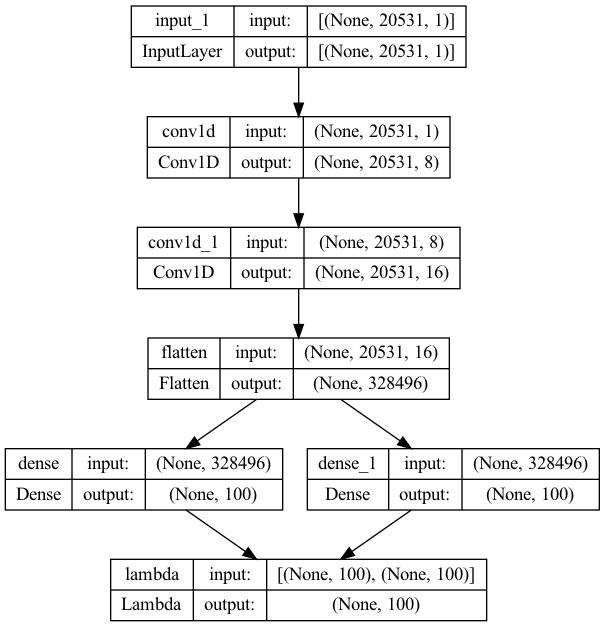

In [14]:
tf.keras.utils.plot_model(
    encoder,
    show_shapes=True,
    to_file='./loss_curves_ignored/1D_enc_v3.png')

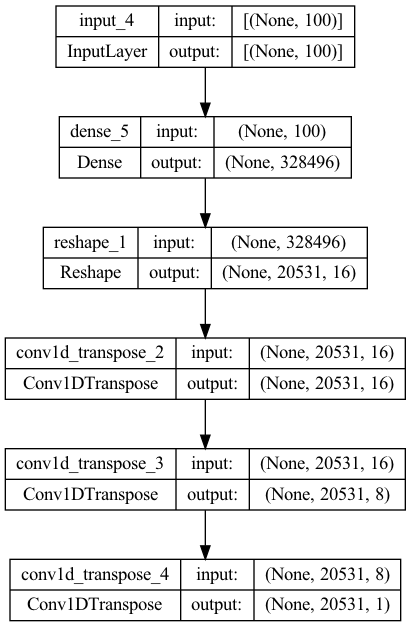

In [17]:
tf.keras.utils.plot_model(
    decoder,
    show_shapes=True,
    to_file='./loss_curves_ignored/1D_dec_v3.png')

In [30]:
epochs = 5

In [19]:
cohort = 'BLCA'

In [20]:
version = 'b_model_03.ipynb'

In [21]:
date = '2022-10-11'

In [ ]:
batch_size = 128

In [ ]:
batch_size = 64

In [22]:
batch_size = 32

In [14]:
type(train_norm)

pandas.core.frame.DataFrame

In [20]:
train_norm.to_numpy().shape

(299, 20531)

In [25]:
train_norm_arr = train_norm.to_numpy()

In [27]:
train_norm_arr.shape

(299, 20531)

In [29]:
train_norm_arr_exp = np.expand_dims(train_norm_arr, axis=-1)

In [30]:
train_norm_arr_exp.shape

(299, 20531, 1)

In [31]:
# Test two, 1D layer model
# wants sample count as firtst dimension of shape
# strategy is to convert to array then reshape

# train_norm_arr = train_norm.to_numpy()
# train_norm_arr_exp = np.expand_dims(train_norm_arr, axis=-1)

# test_norm_arr = test_norm.to_numpy()
# test_norm_arr_exp = np.expand_dims(test_norm_arr, axis=-1)

history = vae.fit(x=train_norm_arr_exp, y=train_norm_arr_exp, epochs=epochs,
                  batch_size=batch_size,
                  validation_data=(test_norm_arr_exp, test_norm_arr_exp))

# history = vae.fit(x=train_norm, y=train_norm, epochs=epochs,
#                   batch_size=batch_size,
#                   validation_data=(test_norm, test_norm))

plt.plot(history.history['loss'],label="loss")
plt.plot(history.history['val_loss'],label="val_loss")
plt.title('VAE embedding loss, '+cohort+' pre-train\n'+

          # file.index.name+', burn-in, n = 495'+

          '1D conv, latent dim = '+str(latent_dim))
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.annotate('test_fraction = .25',
            xy=(.4, .8), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            # fontsize=20
            )

plt.legend(loc="lower left")
# plt.savefig('dir_n/cohort_n'+str(epochs)+'_epochs_2022-08-date_version.png')
plt.savefig('loss_curves_ignored/'+cohort+'_pretrain_'+

            # file.index.name+
            # '_brn_n_'+str(len(brca_burn_in))+'_'+

            str(epochs)+'_epochs_'+
            str(latent_dim)+'_latent_dim_'+
            date+'_'+version+'_r0.png')

Train on 299 samples, validate on 100 samples
Epoch 1/5
299/299 [==============================] - 15s 49ms/sample - loss: 619.6582 - val_loss: 982014472818810496.0000
Epoch 2/5
299/299 [==============================] - 14s 47ms/sample - loss: 588.0112 - val_loss: 674568697827552002048.0000
Epoch 3/5
299/299 [==============================] - 14s 47ms/sample - loss: 559.5328 - val_loss: 6897014429508041728.0000
Epoch 4/5
299/299 [==============================] - 13s 45ms/sample - loss: 536.3239 - val_loss: 688696744969708160.0000
Epoch 5/5


KeyboardInterrupt: 

In [28]:
import matplotlib.pyplot as plt

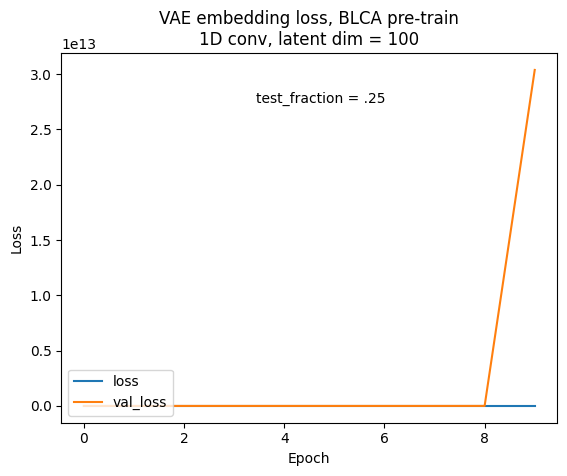

In [29]:
plt.plot(history.history['loss'],label="loss")
plt.plot(history.history['val_loss'],label="val_loss")
plt.title('VAE embedding loss, '+cohort+' pre-train\n'+

          # file.index.name+', burn-in, n = 495'+

          '1D conv, latent dim = '+str(latent_dim))
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.annotate('test_fraction = .25',
            xy=(.4, .8), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            # fontsize=20
            )

plt.legend(loc="lower left")
# plt.savefig('dir_n/cohort_n'+str(epochs)+'_epochs_2022-08-date_version.png')
plt.savefig('loss_curves_ignored/'+cohort+'_pretrain_'+

            # file.index.name+
            # '_brn_n_'+str(len(brca_burn_in))+'_'+

            str(epochs)+'_epochs_'+
            str(latent_dim)+'_latent_dim_'+
            date+'_'+version+'_r0.png')

In [59]:
# Test one, 1D layer model
history = vae.fit(x=train_norm, y=train_norm, epochs=epochs,
                  batch_size=batch_size, # why is this set to 32?
                  validation_data=(test_norm, test_norm))

plt.plot(history.history['loss'],label="loss")
plt.plot(history.history['test_loss'],label="test_loss")
plt.title('VAE embedding loss, '+cohort+' pre-train\n'+

          # file.index.name+', burn-in, n = 495'+

          '1D conv, latent dim = '+str(latent_dim))
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.annotate('test_fraction = .25',
            xy=(.4, .8), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            # fontsize=20
            )

plt.legend(loc="lower left")
# plt.savefig('dir_n/cohort_n'+str(epochs)+'_epochs_2022-08-date_version.png')
plt.savefig('loss_curves_ignored/'+cohort+'_pretrain_'+

            # file.index.name+
            # '_brn_n_'+str(len(brca_burn_in))+'_'+

            str(epochs)+'_epochs_'+
            str(latent_dim)+'_latent_dim_'+
            date+'_'+version+'_r0.png')

ValueError: Error when checking input: expected input_11 to have 3 dimensions, but got array with shape (299, 20531)

In [ ]:
# add verbose

In [ ]:
# Encode and decode train, val independently

In [43]:
tst_ltnt = encoder.predict(X_test_new)

/Users/karlberb/Desktop/RNB00978/sample_count/tf_venv_a/lib/python3.9/site-packages/keras/engine/training_v1.py:2356: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


In [44]:
trn_ltnt = encoder.predict(X_train_new)

In [45]:
tst_dec = decoder.predict(tst_ltnt)

In [46]:
trn_dec = decoder.predict(trn_ltnt)

In [48]:
tst_dec.shape

(100, 144, 144, 1)

In [51]:
tst_dec.flatten(100,20532)

TypeError: flatten() takes from 0 to 1 positional arguments but 2 were given

In [53]:
tst_dec[0].reshape(20736)

array([0.16375491, 0.1794188 , 0.20635223, ..., 0.01227512, 0.0133549 ,
       0.01111129], dtype=float32)

In [ ]:
# train and test are dataframes split off from the original read-in
# file, want to put the decoded arrays to dataframe as to send to UMAP

In [ ]:
# re-running

In [54]:
stor = 
for i in tst_dec:
    break

In [56]:
i.shape

(144, 144, 1)

In [57]:
i.reshape(20736).shape

(20736,)

In [ ]:
# Attempt to flatten input as alt to re-read input
# data structure is reading from gexp original file set

In [35]:
tst_flt = X_test_new.reshape(100, 20736).shape

In [36]:
trn_flt = X_train_new.reshape(299, 20736).shape

In [37]:
tst_frame = pd.DataFrame(tst_flt)

In [38]:
trn_frame = pd.DataFrame(trn_flt)

In [40]:
full_data = pd.concat([tst_frame , trn_frame])

In [41]:
full_data

,0
0,100
1,20736
0,299
1,20736


In [ ]:
# End flatten fail, go to data structure to get the square wrap function, then reverse it
# There is a reshape function in the main